In [67]:
import geopandas as gpd
from shapely.geometry import LineString
import pandas as pd
import numpy as np
import sklearn.metrics as sklm
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import networkx as nx
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


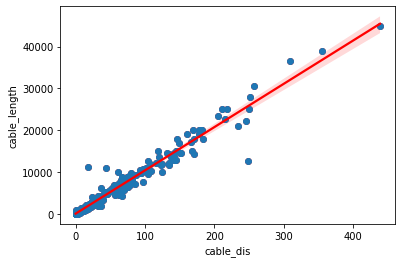

In [3]:
# Predict cable length

with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    raw_withLength = pd.read_sql("select cdr.cable_id , sum(distance_from_previous) as cable_dis, cdr.cable_length from cable_distance_raw cdr where cdr.cable_length is not null group by cdr.cable_id",con=con)

sns.regplot(x='cable_dis',y='cable_length',data=raw_withLength, fit_reg=True, color = 'r',label='Best fit line') 
plt.scatter(x= 'cable_dis', y='cable_length', data=raw_withLength)


In [4]:
sm.OLS(endog=raw_withLength['cable_length'], exog=sm.add_constant(raw_withLength['cable_dis'])).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           cable_length   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.386e+04
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:29:47   Log-Likelihood:                -3967.1
No. Observations:                 471   AIC:                             7938.
Df Residuals:                     469   BIC:                             7947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.6973     58.660      0.881      0.379     -63.571     166.966
cable_dis    103.3934      0.878    117.714      0.000     101.667     105.119
==============================================================================
Omnibus:                      311.758   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59286.572
Skew:                          -1.768   Prob(JB):                         0.00
Kurtosis:                      57.849   Cond. No.                         77.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    raw_noLength = pd.read_sql("select cdr.cable_id , sum(distance_from_previous) as cable_dis from cable_distance_raw cdr where cdr.cable_length is null group by cdr.cable_id",con=con)
raw_noLength['pre_length'] = raw_noLength['cable_dis'] * 103.3934 + 51.6973
raw_noLength

,cable_id,cable_dis,pre_length
0,aqualink,7.678894,845.644286
1,blue,44.317873,4633.872854
2,bt-north-sea,4.522252,519.268304
3,cabo-verde-telecom-domestic-submarine-cable-ph...,4.330440,499.436186
4,cabo-verde-telecom-domestic-submarine-cable-ph...,2.299114,289.410541
5,cabo-verde-telecom-domestic-submarine-cable-ph...,6.648024,739.059089
6,channel-islands-9-liberty-submarine-cable,1.546814,211.627651
7,columbus-iii-azores-portugal,16.796834,1788.379102
8,comoros-domestic-cable-system,2.305179,290.037605
9,denmark-sweden-18,0.104458,62.497582


In [6]:
# Predict cable capacity
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    cable_coor = pd.read_sql("select  lp.cable_id, lp.cable_name, lp.cable_length, lp.cable_finish_year,cccp.capacity, cccp.cost, cccp.pair from landing_points lp left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id where capacity is not null group by lp.cable_id",con=con)
# cable_shap = gpd.GeoDataFrame(cable_coor, crs=4326)

In [7]:
cable_coor

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),3000.0,2009.0,0.010000,100.000,4.0
1,adria-1,Adria-1,440.0,1996.0,0.000622,13.400,NaN
2,aec-1,AEC-1,5521.0,2016.0,78.000000,300.000,6.0
3,africa-1,Africa-1,10000.0,2023.0,192.000000,250.000,8.0
4,africa-coast-to-europe-ace,Africa Coast to Europe (ACE),17000.0,2012.0,20.000000,700.000,NaN
...,...,...,...,...,...,...,...
234,uk-channel-islands-8,UK-Channel Islands-8,237.0,1994.0,0.000155,16.263,NaN
235,unisur,Unisur,265.0,1995.0,0.000560,74.000,NaN
236,unityeac-pacific,Unity/EAC-Pacific,9620.0,2010.0,76.800000,300.000,8.0
237,west-africa-cable-system-wacs,West Africa Cable System (WACS),14530.0,2012.0,14.500000,600.000,4.0


In [8]:
print(cable_coor['cable_finish_year'].min())
print(cable_coor['cable_finish_year'].max())

1991.0
2026.0


In [9]:
cable_coor['capacityPairRatio'] = cable_coor['capacity']/ cable_coor['pair']
cable_coor['logCapacity'] = np.log2(cable_coor['capacity'])
cable_coor['logCapacityPairRatioy'] = np.log2(cable_coor['capacityPairRatio'])

cable_coor['modifiedYear'] = cable_coor['cable_finish_year'] - 1991

cable_coor['cost_perKM'] = cable_coor['cost']/cable_coor['cable_length'] * 1000

cable_coor

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair,capacityPairRatio,logCapacity,logCapacityPairRatioy,modifiedYear,cost_perKM
0,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),3000.0,2009.0,0.010000,100.000,4.0,0.002500,-6.643856,-8.643856,18.0,33.333333
1,adria-1,Adria-1,440.0,1996.0,0.000622,13.400,NaN,NaN,-10.650798,NaN,5.0,30.454545
2,aec-1,AEC-1,5521.0,2016.0,78.000000,300.000,6.0,13.000000,6.285402,3.700440,25.0,54.337982
3,africa-1,Africa-1,10000.0,2023.0,192.000000,250.000,8.0,24.000000,7.584963,4.584963,32.0,25.000000
4,africa-coast-to-europe-ace,Africa Coast to Europe (ACE),17000.0,2012.0,20.000000,700.000,NaN,NaN,4.321928,NaN,21.0,41.176471
...,...,...,...,...,...,...,...,...,...,...,...,...
234,uk-channel-islands-8,UK-Channel Islands-8,237.0,1994.0,0.000155,16.263,NaN,NaN,-12.655444,NaN,3.0,68.620253
235,unisur,Unisur,265.0,1995.0,0.000560,74.000,NaN,NaN,-10.802286,NaN,4.0,279.245283
236,unityeac-pacific,Unity/EAC-Pacific,9620.0,2010.0,76.800000,300.000,8.0,9.600000,6.263034,3.263034,19.0,31.185031
237,west-africa-cable-system-wacs,West Africa Cable System (WACS),14530.0,2012.0,14.500000,600.000,4.0,3.625000,3.857981,1.857981,21.0,41.293875


Text(0.5, 1.0, 'Growth of the cable capacity from 1990 - 2025')

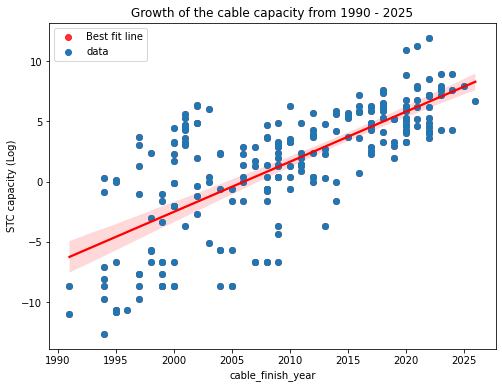

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x='cable_finish_year',y='logCapacity',data=cable_coor, fit_reg=True, color = 'r',label='Best fit line') 
plt.scatter(cable_coor['cable_finish_year'], cable_coor['logCapacity'], label='data')
plt.ylabel('STC capacity (Log)')  
ax.legend(loc='best')
plt.title("Growth of the cable capacity from 1990 - 2025")
# r2 = sklm.r2_score(cable_coor['modifiedYear'], cable_coor['capacityPairRatio'])
# print(r2)

In [11]:
model_description = sm.OLS(endog=cable_coor['logCapacity'], exog=sm.add_constant(cable_coor['cable_finish_year'])).fit()

# Multi-regression
# temp = cable_coor.loc[:, ['logCapacity', 'modifiedYear', 'pair']].dropna()
# model_description = sm.OLS(endog=temp['logCapacity'], exog=sm.add_constant(temp.loc[:, ['modifiedYear', 'pair']].dropna())).fit()


model_description.summary()

# y = 0.4155 * x + -833.4225


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logCapacity   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     254.8
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.93e-39
Time:                        14:29:47   Log-Likelihood:                -644.88
No. Observations:                 239   AIC:                             1294.
Df Residuals:                     237   BIC:                             1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -833.4225     52.298    -15.936      0.000    -936.450    -730.395
cable_finish_year     0.4155      0.026     15.963      0.000       0.364       0.467
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.483
Skew:                          -0.029   Prob(JB):                        0.785
Kurtosis:                       2.788   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
temp = cable_coor.loc[:, ['logCapacity','logCapacityPairRatioy', 'cable_finish_year', 'pair','cost_perKM']].dropna()
model_description = sm.OLS(endog=temp['logCapacityPairRatioy'], exog=sm.add_constant(temp.loc[:, ['cable_finish_year', 'pair','cost_perKM']].dropna())).fit()


model_description.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     logCapacityPairRatioy   R-squared:                       0.548
Model:                               OLS   Adj. R-squared:                  0.539
Method:                    Least Squares   F-statistic:                     63.07
Date:                   Sat, 16 Apr 2022   Prob (F-statistic):           9.26e-27
Time:                           14:29:47   Log-Likelihood:                -414.07
No. Observations:                    160   AIC:                             836.1
Df Residuals:                        156   BIC:                             848.4
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -659.6816     58.962    -11.188      0.000    -776.149    -543.215
cable_finish_year     0.3286      0.029     11.209      0.000       0.271       0.386
pair                 -0.0666      0.011     -5.918      0.000      -0.089      -0.044
cost_perKM           -0.0018      0.002     -1.150      0.252      -0.005       0.001
==============================================================================
Omnibus:                       15.248   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.414
Skew:                          -0.669   Prob(JB):                     0.000165
Kurtosis:                       3.905   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(temp['cable_finish_year'], temp['logCapacity'], 'o', label='data')
# ax.plot(temp['cable_finish_year'], model_description.fittedvalues, 'r--.',label='OLS')
# ax.legend(loc='best')

In [14]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    raw_noCapacity = pd.read_sql("select  lp.cable_id, lp.cable_name, lp.cable_length, lp.cable_finish_year,cccp.capacity, cccp.cost, cccp.pair from landing_points lp left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id where capacity is  null group by lp.cable_id",con=con)

raw_noCapacity

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,2africa,2Africa,45000.0,2023.0,None,925.000,16.0
1,aden-djibouti,Aden-Djibouti,269.0,1994.0,None,6.725,NaN
2,alaska-united-turnagain-arm-auta,Alaska United Turnagain Arm (AUTA),53.0,2012.0,None,1.325,NaN
3,amerigo-vespucci,Amerigo Vespucci,85.0,1999.0,None,15.000,NaN
4,antillas-1,Antillas 1,650.0,1997.0,None,NaN,NaN
...,...,...,...,...,...,...,...
264,ulysses-2,Ulysses 2,NaN,1997.0,None,NaN,NaN
265,venezuelan-festoon,Venezuelan Festoon,1200.0,1998.0,None,NaN,NaN
266,wall-li,WALL-LI,60.0,2024.0,None,3.125,96.0
267,x-link-submarine-cable,X-Link Submarine Cable,775.0,2019.0,None,19.375,NaN


In [15]:
raw_noCapacity['capacity'] = 2 ** (0.4155 * raw_noCapacity['cable_finish_year'] + -833.4225)
raw_noCapacity

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,2africa,2Africa,45000.0,2023.0,140.458488,925.000,16.0
1,aden-djibouti,Aden-Djibouti,269.0,1994.0,0.033135,6.725,NaN
2,alaska-united-turnagain-arm-auta,Alaska United Turnagain Arm (AUTA),53.0,2012.0,5.911401,1.325,NaN
3,amerigo-vespucci,Amerigo Vespucci,85.0,1999.0,0.139855,15.000,NaN
4,antillas-1,Antillas 1,650.0,1997.0,0.078618,NaN,NaN
...,...,...,...,...,...,...,...
264,ulysses-2,Ulysses 2,NaN,1997.0,0.078618,NaN,NaN
265,venezuelan-festoon,Venezuelan Festoon,1200.0,1998.0,0.104857,NaN,NaN
266,wall-li,WALL-LI,60.0,2024.0,187.338031,3.125,96.0
267,x-link-submarine-cable,X-Link Submarine Cable,775.0,2019.0,44.384991,19.375,NaN


In [16]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    raw_withCost = pd.read_sql("select  lp.cable_id, lp.cable_name, lp.cable_length, lp.cable_finish_year,cccp.capacity, cccp.cost, cccp.pair from landing_points lp left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id where cccp.cost is not null and cable_length is not null group by lp.cable_id",con=con)

raw_withCost

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,2africa,2Africa,45000.0,2023.0,NaN,925.000,16.0
1,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),3000.0,2009.0,0.010000,100.000,4.0
2,aden-djibouti,Aden-Djibouti,269.0,1994.0,NaN,6.725,NaN
3,adria-1,Adria-1,440.0,1996.0,0.000622,13.400,NaN
4,aec-1,AEC-1,5521.0,2016.0,78.000000,300.000,6.0
...,...,...,...,...,...,...,...
336,unisur,Unisur,265.0,1995.0,0.000560,74.000,NaN
337,unityeac-pacific,Unity/EAC-Pacific,9620.0,2010.0,76.800000,300.000,8.0
338,wall-li,WALL-LI,60.0,2024.0,NaN,3.125,96.0
339,west-africa-cable-system-wacs,West Africa Cable System (WACS),14530.0,2012.0,14.500000,600.000,4.0


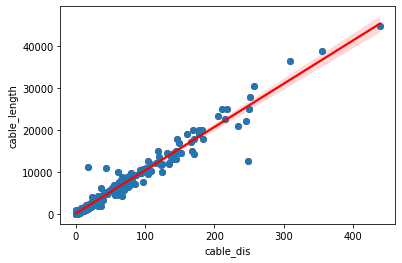

In [17]:
sns.regplot(x='cable_dis',y='cable_length',data=raw_withLength, fit_reg=True, color = 'r',label='Best fit line') 
plt.scatter(raw_withLength['cable_dis'], raw_withLength['cable_length'], label='data')


In [18]:
sm.OLS(endog=raw_withCost['cost'], exog=sm.add_constant(raw_withCost['cable_length'])).fit().summary()


# y = 0.0250 * x + 32.7843

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     558.3
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.23e-73
Time:                        14:29:47   Log-Likelihood:                -2123.8
No. Observations:                 341   AIC:                             4252.
Df Residuals:                     339   BIC:                             4259.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.7843      7.822      4.191      0.000      17.398      48.170
cable_length     0.0250      0.001     23.627      0.000       0.023       0.027
==============================================================================
Omnibus:                      184.442   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2302.654
Skew:                           1.951   Prob(JB):                         0.00
Kurtosis:                      15.118   Cond. No.                     8.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    raw_noCost = pd.read_sql("select lp.cable_id, lp.cable_name, lp.cable_length, lp.cable_finish_year,cccp.capacity, cccp.cost, cccp.pair from landing_points lp left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id where cccp.cost is null and cable_length is not null group by lp.cable_id",con=con)

raw_noCost

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,antillas-1,Antillas 1,650.0,1997.0,NaN,None,NaN
1,apollo-east-and-west,Apollo East and West,670.0,2024.0,NaN,None,NaN
2,arsat-submarine-fiber-optic-cable,ARSAT Submarine Fiber Optic Cable,40.0,2012.0,NaN,None,NaN
3,asia-connect-cable-1-acc1,Asia Connect Cable 1 (ACC1),18000.0,2024.0,NaN,None,NaN
4,atlas-offshore,Atlas Offshore,1634.0,2007.0,NaN,None,NaN
...,...,...,...,...,...,...,...
130,trans-caspian-fiber-optic-tcfo,Trans Caspian Fiber Optic (TCFO),341.0,2022.0,NaN,None,NaN
131,transcan-2,TRANSCAN-2,238.0,1990.0,NaN,None,NaN
132,turcyos-1,Turcyos-1,110.0,1993.0,NaN,None,NaN
133,venezuelan-festoon,Venezuelan Festoon,1200.0,1998.0,NaN,None,NaN


In [20]:
raw_noCost['cost'] = round( (0.0250 * raw_noCost['cable_length'] + 32.7843) ,2)
raw_noCost


,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,antillas-1,Antillas 1,650.0,1997.0,NaN,49.03,NaN
1,apollo-east-and-west,Apollo East and West,670.0,2024.0,NaN,49.53,NaN
2,arsat-submarine-fiber-optic-cable,ARSAT Submarine Fiber Optic Cable,40.0,2012.0,NaN,33.78,NaN
3,asia-connect-cable-1-acc1,Asia Connect Cable 1 (ACC1),18000.0,2024.0,NaN,482.78,NaN
4,atlas-offshore,Atlas Offshore,1634.0,2007.0,NaN,73.63,NaN
...,...,...,...,...,...,...,...
130,trans-caspian-fiber-optic-tcfo,Trans Caspian Fiber Optic (TCFO),341.0,2022.0,NaN,41.31,NaN
131,transcan-2,TRANSCAN-2,238.0,1990.0,NaN,38.73,NaN
132,turcyos-1,Turcyos-1,110.0,1993.0,NaN,35.53,NaN
133,venezuelan-festoon,Venezuelan Festoon,1200.0,1998.0,NaN,62.78,NaN


In [21]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    cable_coor = pd.read_sql("select  lp.cable_id, lp.cable_name, lp.cable_length, lp.cable_finish_year,cccp.capacity, cccp.cost, cccp.pair from landing_points lp left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id group by lp.cable_id",con=con)
# cable_shap = gpd.GeoDataFrame(cable_coor, crs=4326)
cable_coor

,cable_id,cable_name,cable_length,cable_finish_year,capacity,cost,pair
0,2africa,2Africa,45000.0,2023.0,NaN,925.000,16.0
1,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),3000.0,2009.0,0.010000,100.000,4.0
2,aden-djibouti,Aden-Djibouti,269.0,1994.0,NaN,6.725,NaN
3,adria-1,Adria-1,440.0,1996.0,0.000622,13.400,NaN
4,aec-1,AEC-1,5521.0,2016.0,78.000000,300.000,6.0
...,...,...,...,...,...,...,...
499,wall-li,WALL-LI,60.0,2024.0,NaN,3.125,96.0
500,west-africa-cable-system-wacs,West Africa Cable System (WACS),14530.0,2012.0,14.500000,600.000,4.0
501,x-link-submarine-cable,X-Link Submarine Cable,775.0,2019.0,NaN,19.375,NaN
502,yellow,Yellow,7001.0,2000.0,NaN,NaN,NaN


In [22]:
raw_noCapacity.to_csv("/Users/dijiongyuequ/Downloads/raw_noCapacity.csv")
raw_noCost.to_csv("/Users/dijiongyuequ/Downloads/raw_noCost.csv")
raw_noLength.to_csv("/Users/dijiongyuequ/Downloads/raw_noLength.csv")

## Data refactor

In [23]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    cable_predict = pd.read_sql("select lp.cable_id, lp.cable_name, cable_owners, cable_suppliers, cable_finish, lp.cable_finish_year, lp.cable_length as ac_length, cccp.capacity as ac_cap, cccp.cost as ac_cost, cccp.pair as ac_pair, nLength.pre_length as pre_length ,nCap.capacity as pre_cap, nCost.cost as pre_cost from landing_points lp left join raw_noCapacity nCap on lp.cable_id = nCap.cable_id left join cable_cost_capacity_pair cccp on lp.cable_id = cccp.cable_id left join raw_noCost nCost on lp.cable_id = nCost.cable_id left join raw_noLength nLength on lp.cable_id = nLength.cable_id group by lp.cable_id",con=con)
# cable_shap = gpd.GeoDataFrame(cable_coor, crs=4326)
cable_predict


,cable_id,cable_name,cable_owners,cable_suppliers,cable_finish,cable_finish_year,ac_length,ac_cap,ac_cost,ac_pair,pre_length,pre_cap,pre_cost
0,2africa,2Africa,"China Mobile, MTN Group, Meta, Orange, Saudi T...",ASN,2023,2023.0,45000.0,NaN,925.000,16.0,NaN,140.458488,NaN
1,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),Alaska Communications,Subcom,2009 April,2009.0,3000.0,0.010000,100.000,4.0,NaN,NaN,NaN
2,aden-djibouti,Aden-Djibouti,"Djibouti Telecom, Orange, Tata Communications,...",ASN,1994,1994.0,269.0,NaN,6.725,NaN,NaN,0.033135,NaN
3,adria-1,Adria-1,"ALBtelecom, Hrvatski Telekom",ASN,1996 September,1996.0,440.0,0.000622,13.400,NaN,NaN,NaN,NaN
4,aec-1,AEC-1,Aqua Comms,Subcom,2016 January,2016.0,5521.0,78.000000,300.000,6.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,wall-li,WALL-LI,Crosslake Fibre,None,2024 Q4,2024.0,60.0,NaN,3.125,96.0,NaN,187.338031,NaN
500,west-africa-cable-system-wacs,West Africa Cable System (WACS),"Altice Portugal, Angola Cables, Broadband Infr...",ASN,2012 May,2012.0,14530.0,14.500000,600.000,4.0,NaN,NaN,NaN
501,x-link-submarine-cable,X-Link Submarine Cable,E-Networks Inc.,None,2019 December,2019.0,775.0,NaN,19.375,NaN,NaN,44.384991,NaN
502,yellow,Yellow,Lumen,Subcom,2000 September,2000.0,7001.0,NaN,NaN,NaN,NaN,0.186533,207.81


In [24]:
# missing = cable_coor['ac_cap'].isnull() # get nans
# target = cable_coor['pre_cap']
# new_open = cable_coor['ac_cap'].copy() # make copy

# # loop missing and test against a True value
# # if so, get the 'Last' value at index and
# # populate new_open value at index
# for i in range(missing.shape[0]):
#     if missing[i] == True:
#         new_open.iloc[i] = target.iloc[i]

# # replace the 'Open' values with new 'Open' values
# cable_coor['Open'] = new_open
# cable_coor

def merge_actual_predict_value(df, act_columnName, pre_columnName, mer_columnName):
    missing = df[act_columnName].isnull() # get nans
    target = df[pre_columnName]
    new_open = df[act_columnName].copy() # make copy

    # loop missing and test against a True value
    # if so, get the Last value at index and
    # populate new_open value at index
    for i in range(missing.shape[0]):
        if missing[i] == True:
            new_open.iloc[i] = target.iloc[i]

    # replace the Open values with new Open values
    df[mer_columnName] = new_open

# merge capacity
merge_actual_predict_value(cable_predict, "ac_cap", "pre_cap", "merge_capacity") 
merge_actual_predict_value(cable_predict, "ac_length", "pre_length", "merge_length")


In [25]:
cable_predict['pre_cost'] = round( (0.0250 * cable_predict['merge_length'] + 32.7843) ,2)
merge_actual_predict_value(cable_predict, "ac_cost", "pre_cost", "merge_cost") 
cable_predict

,cable_id,cable_name,cable_owners,cable_suppliers,cable_finish,cable_finish_year,ac_length,ac_cap,ac_cost,ac_pair,pre_length,pre_cap,pre_cost,merge_capacity,merge_length,merge_cost
0,2africa,2Africa,"China Mobile, MTN Group, Meta, Orange, Saudi T...",ASN,2023,2023.0,45000.0,NaN,925.000,16.0,NaN,140.458488,1157.78,140.458488,45000.000000,925.000
1,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),Alaska Communications,Subcom,2009 April,2009.0,3000.0,0.010000,100.000,4.0,NaN,NaN,107.78,0.010000,3000.000000,100.000
2,aden-djibouti,Aden-Djibouti,"Djibouti Telecom, Orange, Tata Communications,...",ASN,1994,1994.0,269.0,NaN,6.725,NaN,NaN,0.033135,39.51,0.033135,269.000000,6.725
3,adria-1,Adria-1,"ALBtelecom, Hrvatski Telekom",ASN,1996 September,1996.0,440.0,0.000622,13.400,NaN,NaN,NaN,43.78,0.000622,440.000000,13.400
4,aec-1,AEC-1,Aqua Comms,Subcom,2016 January,2016.0,5521.0,78.000000,300.000,6.0,NaN,NaN,170.81,78.000000,5521.000000,300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,wall-li,WALL-LI,Crosslake Fibre,None,2024 Q4,2024.0,60.0,NaN,3.125,96.0,NaN,187.338031,34.28,187.338031,60.000000,3.125
500,west-africa-cable-system-wacs,West Africa Cable System (WACS),"Altice Portugal, Angola Cables, Broadband Infr...",ASN,2012 May,2012.0,14530.0,14.500000,600.000,4.0,NaN,NaN,396.03,14.500000,14530.000000,600.000
501,x-link-submarine-cable,X-Link Submarine Cable,E-Networks Inc.,None,2019 December,2019.0,775.0,NaN,19.375,NaN,NaN,44.384991,52.16,44.384991,775.000000,19.375
502,yellow,Yellow,Lumen,Subcom,2000 September,2000.0,7001.0,NaN,NaN,NaN,NaN,0.186533,207.81,0.186533,7001.000000,207.810


/var/folders/93/98m4gg790h36hw_xcd31b1d40000gn/T/ipykernel_82313/890765092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cable_predict['logCapacity'] = np.log2(cable_predict['merge_capacity'])


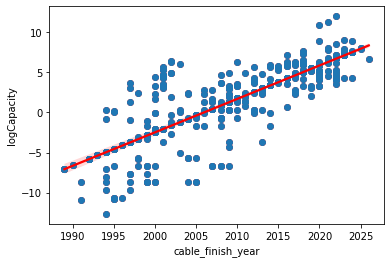

In [66]:
# cable_coor
cable_predict['logCapacity'] = np.log2(cable_predict['merge_capacity'])
sns.regplot(x='cable_finish_year',y='logCapacity',data=cable_predict, fit_reg=True, color = 'r',label='Best fit line') 
plt.scatter(cable_predict['cable_finish_year'], cable_predict['logCapacity'], label='data')


In [27]:
cable_predict = cable_predict[cable_predict['cable_finish_year'].notna()]


In [28]:
cable_predict

,cable_id,cable_name,cable_owners,cable_suppliers,cable_finish,cable_finish_year,ac_length,ac_cap,ac_cost,ac_pair,pre_length,pre_cap,pre_cost,merge_capacity,merge_length,merge_cost,logCapacity
0,2africa,2Africa,"China Mobile, MTN Group, Meta, Orange, Saudi T...",ASN,2023,2023.0,45000.0,NaN,925.000,16.0,NaN,140.458488,1157.78,140.458488,45000.000000,925.000,7.134000
1,acs-alaska-oregon-network-akorn,ACS Alaska-Oregon Network (AKORN),Alaska Communications,Subcom,2009 April,2009.0,3000.0,0.010000,100.000,4.0,NaN,NaN,107.78,0.010000,3000.000000,100.000,-6.643856
2,aden-djibouti,Aden-Djibouti,"Djibouti Telecom, Orange, Tata Communications,...",ASN,1994,1994.0,269.0,NaN,6.725,NaN,NaN,0.033135,39.51,0.033135,269.000000,6.725,-4.915500
3,adria-1,Adria-1,"ALBtelecom, Hrvatski Telekom",ASN,1996 September,1996.0,440.0,0.000622,13.400,NaN,NaN,NaN,43.78,0.000622,440.000000,13.400,-10.650798
4,aec-1,AEC-1,Aqua Comms,Subcom,2016 January,2016.0,5521.0,78.000000,300.000,6.0,NaN,NaN,170.81,78.000000,5521.000000,300.000,6.285402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,wall-li,WALL-LI,Crosslake Fibre,None,2024 Q4,2024.0,60.0,NaN,3.125,96.0,NaN,187.338031,34.28,187.338031,60.000000,3.125,7.549500
500,west-africa-cable-system-wacs,West Africa Cable System (WACS),"Altice Portugal, Angola Cables, Broadband Infr...",ASN,2012 May,2012.0,14530.0,14.500000,600.000,4.0,NaN,NaN,396.03,14.500000,14530.000000,600.000,3.857981
501,x-link-submarine-cable,X-Link Submarine Cable,E-Networks Inc.,None,2019 December,2019.0,775.0,NaN,19.375,NaN,NaN,44.384991,52.16,44.384991,775.000000,19.375,5.472000
502,yellow,Yellow,Lumen,Subcom,2000 September,2000.0,7001.0,NaN,NaN,NaN,NaN,0.186533,207.81,0.186533,7001.000000,207.810,-2.422500


In [62]:
# cable_predict
df1 = cable_predict[(cable_predict['logCapacity'] < (cable_predict['cable_finish_year']*(0.4164) + -835.2839) * 2) ]
df2 = cable_predict[(cable_predict['logCapacity'] > (cable_predict['cable_finish_year']*(0.4164) + -835.2839) * 0.4) ]
df3 = df1.merge(df2, how ='inner', on='cable_id')
df3.shape

(269, 33)

In [63]:
sm.OLS(endog=cable_predict['logCapacity'], exog=sm.add_constant(cable_predict['cable_finish_year'])).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logCapacity   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1338.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          2.55e-143
Time:                        15:11:13   Log-Likelihood:                -1163.8
No. Observations:                 501   AIC:                             2332.
Df Residuals:                     499   BIC:                             2340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -835.2839     22.877    -36.512      0.000    -880.232    -790.336
cable_finish_year     0.4164      0.011     36.578      0.000       0.394       0.439
==============================================================================
Omnibus:                       40.191   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.316
Skew:                          -0.098   Prob(JB):                     1.90e-39
Kurtosis:                       5.916   Cond. No.                     4.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
sm.OLS(endog=df3['logCapacity_x'], exog=sm.add_constant(df3['cable_finish_year_x'])).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logCapacity_x   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     884.3
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.03e-86
Time:                        15:11:19   Log-Likelihood:                -397.81
No. Observations:                 269   AIC:                             799.6
Df Residuals:                     267   BIC:                             806.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -787.7408     26.650    -29.559      0.000    -840.211    -735.270
cable_finish_year_x     0.3929      0.013     29.738      0.000       0.367       0.419
==============================================================================
Omnibus:                       74.206   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.726
Skew:                           0.934   Prob(JB):                    1.49e-100
Kurtosis:                       9.126   Cond. No.                     8.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

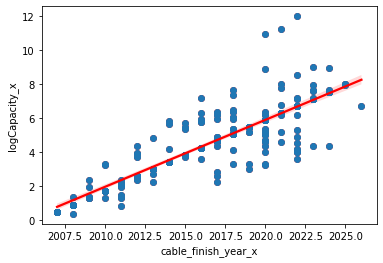

In [65]:
sns.regplot(x='cable_finish_year_x',y='logCapacity_x',data=df3, fit_reg=True, color = 'r',label='Best fit line') 
plt.scatter(df3['cable_finish_year_x'], df3['logCapacity_x'], label='data')


In [31]:
# rf_predict = rf.predict(test_x)
mse = sklm.mean_squared_error(cable_predict['logCapacity'],cable_predict['cable_finish_year'])
r2 = sklm.r2_score(cable_predict['logCapacity'],cable_predict['cable_finish_year'])
rmse = sklm.mean_squared_error(cable_predict['logCapacity'],cable_predict['cable_finish_year'], squared=False)
mae = sklm.mean_absolute_error(cable_predict['logCapacity'],cable_predict['cable_finish_year'])

print(f"Mean squared error :{mse}")
print(f"Root mean squared error :{rmse}")
print(f"R2 :{r2}")
print(f"Mean absolute error :{mae}")


Mean squared error :4032406.12806392
Root mean squared error :2008.085189443894
R2 :-179634.81519936706
Mean absolute error :2008.075674372165


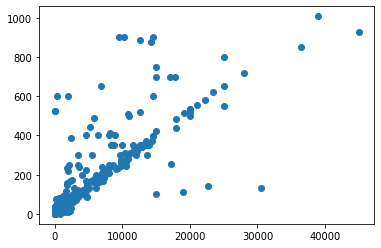

In [32]:
plt.scatter(cable_predict['merge_length'], cable_predict['merge_cost'], label='data')


In [33]:
model_description.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     logCapacityPairRatioy   R-squared:                       0.548
Model:                               OLS   Adj. R-squared:                  0.539
Method:                    Least Squares   F-statistic:                     63.07
Date:                   Sat, 16 Apr 2022   Prob (F-statistic):           9.26e-27
Time:                           14:29:48   Log-Likelihood:                -414.07
No. Observations:                    160   AIC:                             836.1
Df Residuals:                        156   BIC:                             848.4
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -659.6816     58.962    -11.188      0.000    -776.149    -543.215
cable_finish_year     0.3286      0.029     11.209      0.000       0.271       0.386
pair                 -0.0666      0.011     -5.918      0.000      -0.089      -0.044
cost_perKM           -0.0018      0.002     -1.150      0.252      -0.005       0.001
==============================================================================
Omnibus:                       15.248   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.414
Skew:                          -0.669   Prob(JB):                     0.000165
Kurtosis:                       3.905   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
with sqlite3.connect('../../Dataset/submarine_cable.sqlite') as con:
    c = con.cursor()
    demandSupply_gap = pd.read_sql('select landingPoint_country, code, continent, sum(merge_capacity) as merge_capacity, (sum(merge_capacity)*1000000 - "2021")/1000000 as gap_2021, (sum(merge_capacity)*1000000 - "2022")/1000000 as gap_2022, (sum(merge_capacity)*1000000 - "2023")/1000000 as gap_2023, (sum(merge_capacity)*1000000 - "2024")/1000000 as gap_2024, (sum(merge_capacity)*1000000 - "2025")/1000000 as gap_2025, (sum(merge_capacity)*1000000 - "2026")/1000000 as gap_2026, countryName from country_bandwidth_year cby left join raw_countryBandwidth cb on cb.countryName=cby.landingPoint_country group by landingPoint_country having gap_2026 is not null order by gap_2026 asc limit 15',con=con)
demandSupply_gap

,landingPoint_country,code,continent,merge_capacity,gap_2021,gap_2022,gap_2023,gap_2024,gap_2025,gap_2026,countryName
0,Poland,PL,Europe,0.007500,-0.875807,-0.908642,-0.941477,-0.974312,-1.007147,-1.039982,Poland
1,Romania,RO,Europe,0.001200,-0.852218,-0.885345,-0.918473,-0.951600,-0.984727,-1.017855,Romania
2,Croatia,HR,Europe,0.033757,-0.532256,-0.578611,-0.624967,-0.671322,-0.717677,-0.764033,Croatia
3,Syria,SY,Asia,0.005622,-0.280271,-0.306188,-0.332105,-0.358022,-0.383939,-0.409856,Syria
4,Latvia,LV,Europe,0.079829,-0.248741,-0.274019,-0.299298,-0.324577,-0.349856,-0.375135,Latvia
5,Albania,AL,Europe,0.003122,-0.183796,-0.198811,-0.213825,-0.228839,-0.243853,-0.258867,Albania
6,Estonia,EE,Europe,0.282488,0.107317,0.093961,0.080604,0.067248,0.053892,0.040535,Estonia
7,Vanuatu,VU,Oceania,0.320000,0.318957,0.318866,0.318776,0.318685,0.318594,0.318503,Vanuatu
8,Faroe Islands,FO,Europe,0.597500,0.559432,0.555728,0.552024,0.548320,0.544616,0.540912,Faroe Islands
9,Haiti,HT,North America,1.050081,1.047009,1.047009,1.047009,1.047009,1.047009,1.047009,Haiti


In [63]:
def continent_map(continent):
    # plt.cm.get_cmap('Set1')(0.7)
    con_color_dict = {"Europe": (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0), "Asia": (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0), "Oceania": (1.0, 0.4980392156862745, 0.0, 1.0), "North America": (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0)}
    return con_color_dict[continent]
colors = list(map(lambda x : continent_map(x), demandSupply_gap['continent']))

colors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (1.0, 0.4980392156862745, 0.0, 1.0),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.21568627450980393, 0.49411764705882355, 0.72156862745

Text(0.5, 1.0, 'Estimated global STC supply-demand capacity gap in 2026')

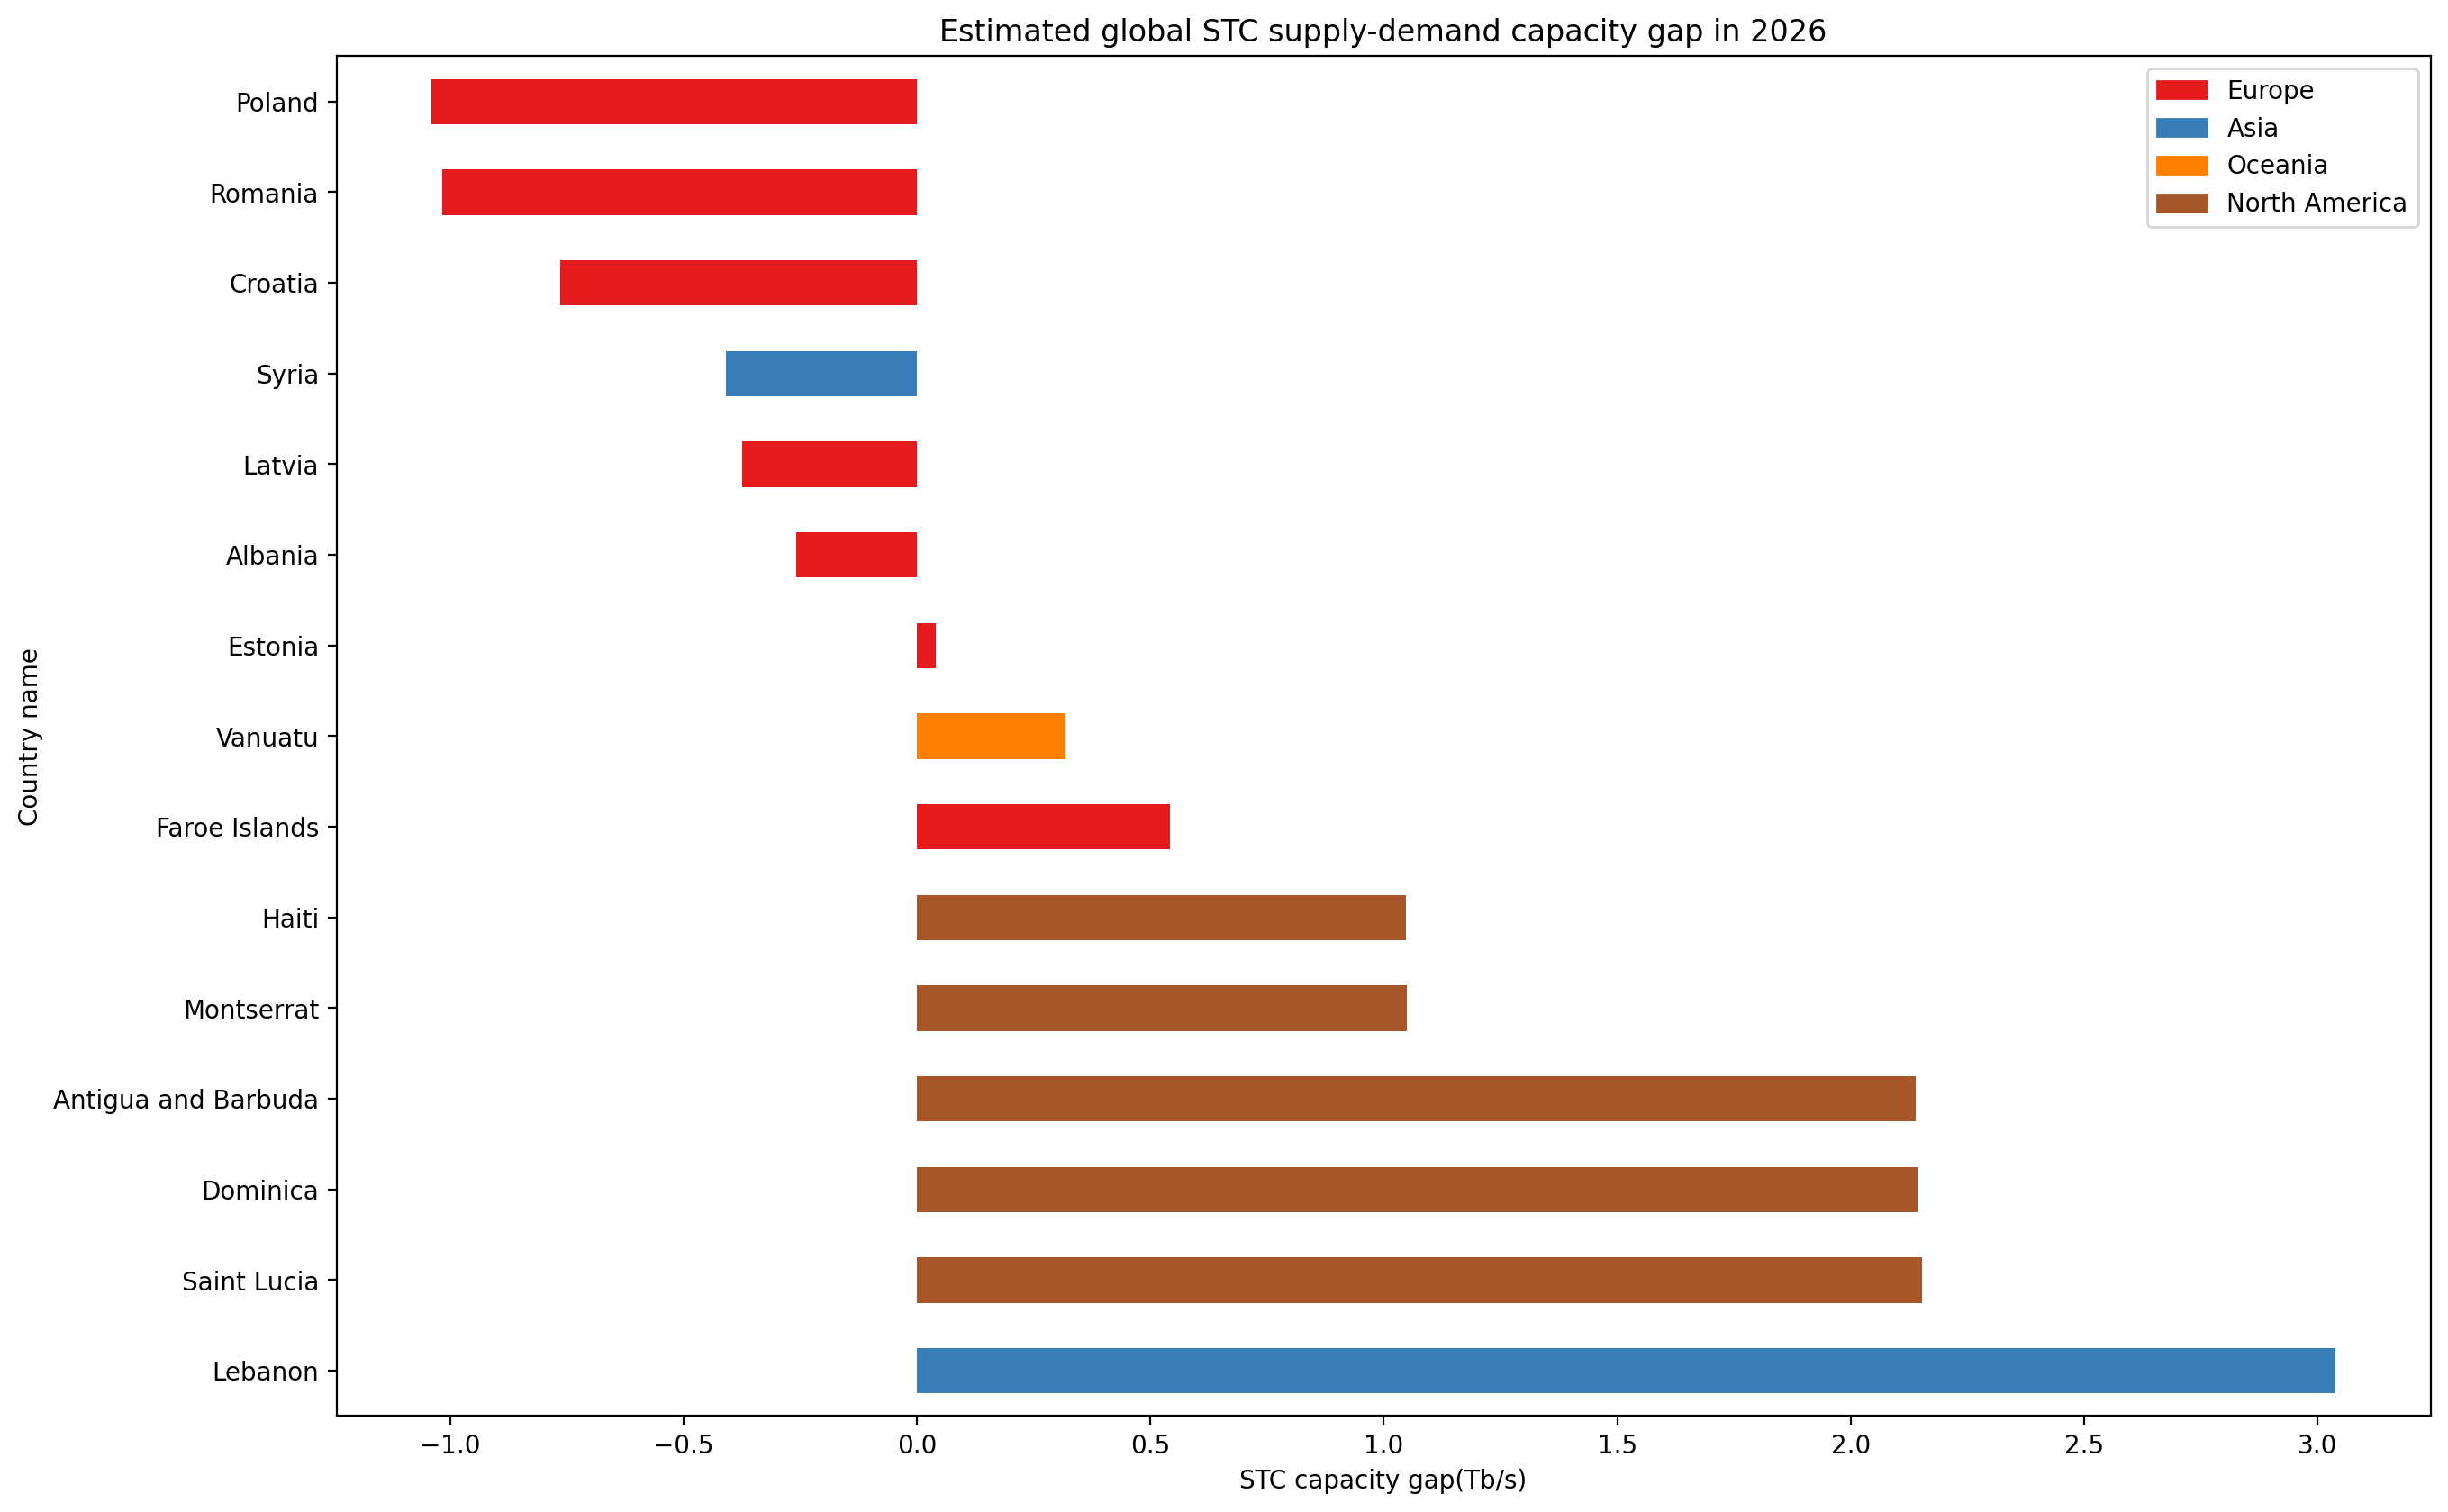

In [76]:
fig     = plt.figure(figsize=(15,10),dpi = 200)
ax      = plt.subplot(111)

# colors = ['g' if e >= 0 else 'r' for e in demandSupply_gap['gap_2026']]

demandSupply_gap.plot.barh(x='landingPoint_country', y='gap_2026', color = colors, legend=False, ax=ax)
ax.invert_yaxis()

con_color_dict = {"Europe": (0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0), "Asia": (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0), "Oceania": (1.0, 0.4980392156862745, 0.0, 1.0), "North America": (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0)}
con_color_legend_list = []
for x in con_color_dict:
    con_color_legend_list.append(mpatches.Patch(color=con_color_dict[x], label=x))
plt.legend(handles=con_color_legend_list)

plt.xlabel("STC capacity gap(Tb/s)")
plt.ylabel("Country name")
plt.title("Estimated global STC supply-demand capacity gap in 2026")


In [75]:
plt.cm.get_cmap('Set1')(0.1)


(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0)